In [106]:
import cv2
import os
import numpy as np
np.random.seed(1120)
from sklearn.model_selection import train_test_split



In [70]:
top_path = 'C:/Users/USER/Desktop/mask_data/' # 안에 chin_mask , full_mask... 로 하위 폴더가 있는 상위 폴더 경로

save_path = 'C:/Users/USER/Desktop/save_data/' # 저장할 경로 (안에 빈 train , test 폴더 먼저 만들어 놓고 실행)


folders = os.listdir(top_path)

for folder in folders:
    
    files = os.listdir(top_path+folder+'/')
    
    image_files = [file for file in files if file.endswith(".png")]
    
    image_1000 = image_files[-1000:]
    
    train,test = train_test_split(image_1000,test_size=0.1,random_state=1120)
    train,validate = train_test_split(train,test_size=(2/9),random_state=1120)
    
    for img in train:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'train/'+folder+'/'+img, original.copy())
        
    for img in validate:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'validate/'+folder+'/'+img, original.copy())
        
    for img in test:
        original=cv2.imread(top_path+folder+'/'+img)
        cv2.imwrite(save_path+'test/'+folder+'/'+img, original.copy())

In [107]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8,2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
validate_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [108]:
train_generator=train_datagen.flow_from_directory(
    "C:/Users/USER/Desktop/save_data/train/",
    batch_size=10,
    target_size=(120,90),
    class_mode='categorical')

validation_generator=validate_datagen.flow_from_directory(
    "C:/Users/USER/Desktop/save_data/validate/",
    batch_size=10,
    target_size=(120,90),
    class_mode='categorical')

test_generator=test_datagen.flow_from_directory(
    "C:/Users/USER/Desktop/save_data/test/",
    batch_size=10,
    target_size=(120,90),
    class_mode='categorical')

Found 2800 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [109]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from keras.optimizers import Adam

In [110]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(120, 90, 3)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.build()
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 120, 90, 32)       2432      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 60, 45, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 56, 41, 48)        38448     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 28, 20, 48)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 26880)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               6881536   
_________________________________________________________________
dense_24 (Dense)             (None, 84)              

In [111]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [58]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [90]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=5)

In [92]:
callbacks = [earlystop]

In [113]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch=280,
    epochs=50,
    validation_steps=80,
    verbose=1
)

Epoch 1/50
280/280 - 93s - loss: 0.3902 - accuracy: 0.8586 - val_loss: 0.2002 - val_accuracy: 0.9488
Epoch 2/50
280/280 - 74s - loss: 0.2597 - accuracy: 0.9082 - val_loss: 0.1119 - val_accuracy: 0.9688
Epoch 3/50
280/280 - 69s - loss: 0.2280 - accuracy: 0.9225 - val_loss: 0.1161 - val_accuracy: 0.9650
Epoch 4/50
280/280 - 61s - loss: 0.1975 - accuracy: 0.9293 - val_loss: 0.1393 - val_accuracy: 0.9538
Epoch 5/50
280/280 - 68s - loss: 0.1867 - accuracy: 0.9375 - val_loss: 0.0842 - val_accuracy: 0.9775
Epoch 6/50
280/280 - 63s - loss: 0.1546 - accuracy: 0.9439 - val_loss: 0.0998 - val_accuracy: 0.9737
Epoch 7/50
280/280 - 66s - loss: 0.1664 - accuracy: 0.9379 - val_loss: 0.0779 - val_accuracy: 0.9787
Epoch 8/50
280/280 - 64s - loss: 0.1514 - accuracy: 0.9496 - val_loss: 0.0983 - val_accuracy: 0.9787
Epoch 9/50
280/280 - 67s - loss: 0.1817 - accuracy: 0.9361 - val_loss: 0.2056 - val_accuracy: 0.9375
Epoch 10/50
280/280 - 61s - loss: 0.1611 - accuracy: 0.9446 - val_loss: 0.0689 - val_accura

Epoch 1/50
280/280 [==============================] - 78s 278ms/step - loss: 0.5785 - accuracy: 0.7650 - val_loss: 0.4530 - val_accuracy: 0.8217
Epoch 2/50
280/280 [==============================] - 66s 235ms/step - loss: 0.3343 - accuracy: 0.8775 - val_loss: 0.3229 - val_accuracy: 0.9067
Epoch 3/50
280/280 [==============================] - 67s 239ms/step - loss: 0.2705 - accuracy: 0.9089 - val_loss: 0.1244 - val_accuracy: 0.9733
Epoch 4/50
280/280 [==============================] - 79s 282ms/step - loss: 0.2223 - accuracy: 0.9243 - val_loss: 0.1182 - val_accuracy: 0.9667
Epoch 5/50
280/280 [==============================] - 85s 305ms/step - loss: 0.2025 - accuracy: 0.9293 - val_loss: 0.1220 - val_accuracy: 0.9600
Epoch 6/50
280/280 [==============================] - 93s 333ms/step - loss: 0.1919 - accuracy: 0.9375 - val_loss: 0.0946 - val_accuracy: 0.9767
Epoch 7/50
280/280 [==============================] - 87s 310ms/step - loss: 0.1990 - accuracy: 0.9336 - val_loss: 0.0953 - val_ac

In [115]:
model.evaluate(test_generator)

40/40 [==============================] - 4s 96ms/step - loss: 0.0766 - accuracy: 0.9725


[0.07659434527158737, 0.9725000262260437]

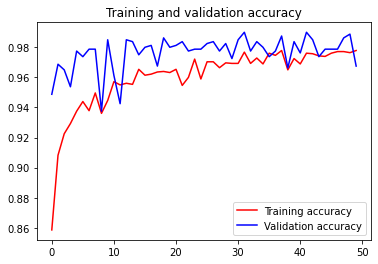

In [116]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
fig = plt.gcf()
fig.savefig('from_basic.png',dpi=fig.dpi)
plt.show()

In [117]:
from keras.models import load_model

model.save('C:/Users/USER/Desktop/from_LenetV5.h5')
model.save_weights('C:/Users/USER/Desktop/from_LenetV5_weights.h5')